##**Bacharelado em Ciência de Dados - Univesp** 🏆
---
###**Disciplina - Mineração de Dados** 🦘
###**Link**: https://ava.univesp.br/ultra/courses/_5991_1/cl/outline 🛸
##**Prof.**Dr. Higor Amario de Souza 🐅
##**Aluno: Aelso Rocha Brito** 🐸
##**notebook**ComAnotaçõesDasVideoaulas 🧧
## **Semestre:** 01.2022 ⚾
---



## Mineração de dados - Semana 5: 

### Exercício sobre análise de agrupamento

Use o algoritmo **complete-linkage** para analisar um conjunto de dados socioeconômicos de países. Para fazer a análise, selecione os atributos **child_mort** e **life_expec** usando 4 grupos, e como a medida de similaridade use a distância euclidiana. Gere o dendograma e o gráfico de dispersão dos dados.

Responda também: quais são os países que têm as piores taxas de mortalidade e expectativa de vida? Os que têm as melhores taxas? Sugestão: filtre o dataframe usando os valores apontados no gráfico de dispersão ou plote os nomes dos países no gráfico.

Descrição dos dados:

* **country**: nome do país
* **child_mort**: mortalidade infantil de crianças até 5 anos a cada mil nascidos
* **exports**: porcentual de participação das exportações no PIB
* **health**: porcentual de gastos com saúde em relação ao PIB
* **imports**: porcentual de participação das importações no PIB
* **income**: renda anual per capita
* **inflation**: taxa de crescimento anual do PIB
* **life_expec**: expectativa de vida de acordo com a taxa de mortalidade
* **total_fer**: número de crianças que poderiam nascer por mulher de acordo com as taxas de fertilidade/idade
* **gdpp**: PIB per capita

Os dados originais foram retirados do Kaggle ([Country Socioeconomic Data](https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data)) e estão disponíveis neste [link](https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/country-data.csv).

#### Importando as bibliotecas e carregando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/country-data.csv'
paises = pd.read_csv(url)
paises.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Vamos ficar somente com as colunas **child_mort** (mortalidade infantil) e **life_expec** (expectativa de vida) para poder ver os dados em um espaço bidimensional. Mas você pode experimentar com as demais colunas e achar relações interessantes, ou usar várias delas simultaneamente.

In [3]:
paises_2d = paises[['child_mort','life_expec']]

Agora, vamos visualizar o dendograma usando o complete-linkage, que vai nos indicar o número de grupos da base de dados.

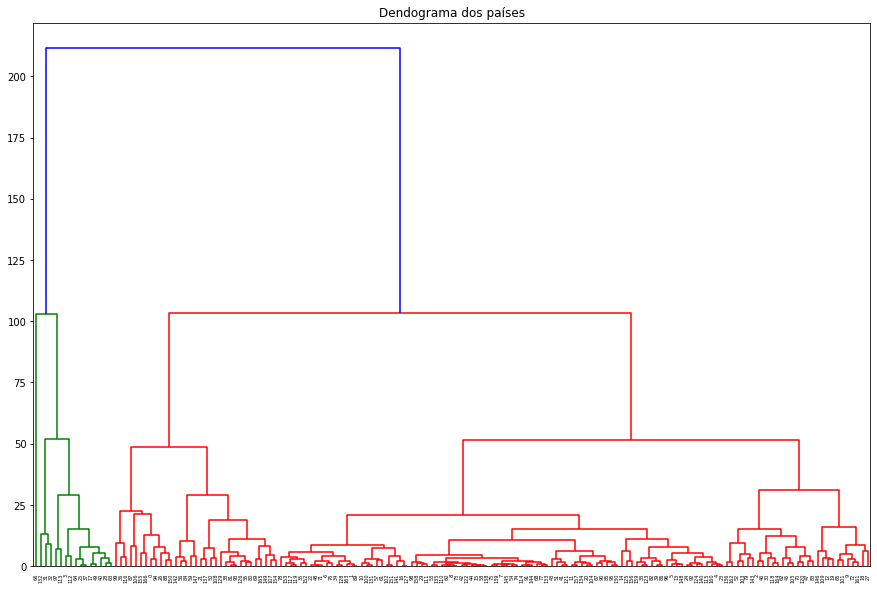

In [4]:
plt.figure(figsize=(15, 10))
plt.title("Dendograma dos países")
dendograma = shc.dendrogram(shc.linkage(paises_2d, method='complete'))

####  Vamos usar 4 grupos, o complete linkage e a distância euclidiana.

In [5]:
grupos = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
grupos.fit_predict(paises_2d)

array([2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 0, 0, 1,
       3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

#### Vamos ver os resultado do processo de agrupamento usando um gráfico de dispersão e pintando os objetos dos grupos com cores diferentes.


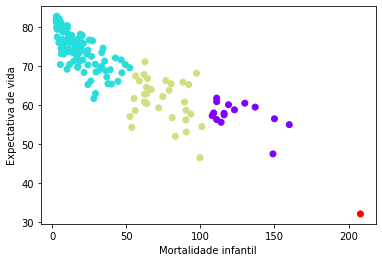

In [6]:
plt.scatter(paises_2d['child_mort'],paises_2d['life_expec'],c=grupos.labels_,cmap='rainbow')
plt.xlabel('Mortalidade infantil')
plt.ylabel('Expectativa de vida')
plt.show()

#### Quais são os países que têm as piores taxas de mortalidade e expectativa de vida? Os que têm as melhores taxas?

Olhando o gráfico de dispersão, podemos ver os valores que podem ser usados para responder a essas questões.

#### Pior taxa de mortalidade

In [7]:
paises['country'][paises['child_mort'] > 200]

66    Haiti
Name: country, dtype: object

#### Pior expectativa de vida

In [8]:
paises['country'][paises['life_expec'] < 35]

66    Haiti
Name: country, dtype: object

#### Melhor taxa de mortalidade

In [9]:
paises['country'][paises['child_mort'] < 3]

68        Iceland
91     Luxembourg
133     Singapore
Name: country, dtype: object

#### Melhor expectativa de vida

In [10]:
paises['country'][paises['life_expec'] > 82]

77           Japan
133      Singapore
145    Switzerland
Name: country, dtype: object

#### Para visualizar os países com melhores e piores índices, vamos adicionar rótulos a alguns pontos do gráfico. Adicionalmente, vamos ver onde o está o Brasil.

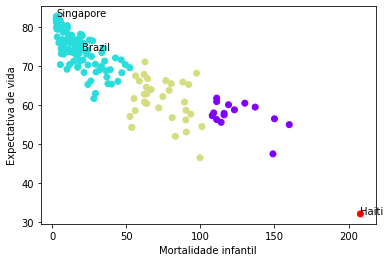

In [11]:
fig, eixo = plt.subplots()

eixo.scatter(paises_2d['child_mort'],paises_2d['life_expec'],c=grupos.labels_,cmap='rainbow')
eixo.set_xlabel('Mortalidade infantil')
eixo.set_ylabel('Expectativa de vida')

# iterando sobre o dataframe original, que tem o nome dos países
for i, texto in enumerate(paises['country']):
    # só vamos adicionar rótulos nos extremos para não poluir a visualização
    if ((paises.iloc[i]['life_expec'] < 35 and paises.iloc[i]['child_mort'] > 200) 
       or (paises.iloc[i]['life_expec'] > 82 and paises.iloc[i]['child_mort'] < 3) 
       or (paises.iloc[i]['country'] == 'Brazil')):
        eixo.annotate(texto, (paises.iloc[i]['child_mort'], paises.iloc[i]['life_expec']))

plt.show()

Experimente outros atributos da base para explorar mais o agrupamento hierárquico. Tente usar também o algoritmo single-linkage e veja as diferenças.